In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Case_study_CarPrice_Assignment.csv",encoding='unicode_escape')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
## PHÂN TÍCH THÔNG TIN
#car_ID : Mã xe
#symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt
#đối an toàn, 3: có rủi ro)
#carName: Tên xe
#fueltype: Loại nhiên liệu
#aspiration: loại hút (turbo hoặc std)
#doornumber: Số lượng cửa
#carbody: Loại thân xe (sedan, wagon, hatchback)
#drivewheel: Loại bánh xe
#enginelocation: Vị trí động cơ
#wheelbase: Chiều dài cơ sở
#carlength: Chiều dài xe
#carwidth: Chiều rộng xe
#carheight: Chiều cao xe
#curbweight: Trọng lượng của xe khi không có người hoặc hành lý
#enginetype: Loại động cơ
#cylindernumber: Số lượng xi lanh đặt trong xe
#enginesize: Kích thước động cơ
#fuelsystem: Hệ thống nhiên liệu của xe ô tô
#boreratio: Tỉ số hành trình
#stroke: số kỳ hoăc kích thước bên trong động cơ
#compressionratio: Tỉ số nén của ôtô
#horsepower: Mã lực
#peakrpm: Tốc độ động cơ cao nhất
#citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
#highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
#price: Giá xe

In [ ]:
df.info()

## Dữ liệu có 205 dòng và 26 cột
## Như vậy, trong bảng dữ liệu không có giá trị Null
## Về kiểu DL:
# Kiểu int64: thuộc tính car_ID, symboling, enginetype,horsepower,peakrpm,citympg,highwaympg
# Kiểu float: thuộc tính wheelbase, carlength,carwidth,carheight
# Kiểu object: các thuộc tính còn lại


In [4]:
df.shape

(205, 26)

In [3]:
## Tách tên xe thành tên hãng
name = df['CarName'].str.split()
name2 = []
for i in name:
    i = i[0]
    # i.unique()
    # print(i)
    name2.append(i)
name2
df.insert(2,"Hang_Car",name2)


In [4]:
df.head()

,car_ID,symboling,Hang_Car,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


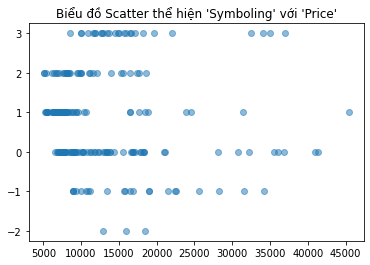

In [5]:
## Vẽ biểu đồ Scatter bằng thư viện Matplotlib
#Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả

x = df.loc[:,'symboling']
y = df.loc[:,'price']
# color = np.random.randint(0,100,50)
plt.title("Biểu đồ Scatter thể hiện 'Symboling' với 'Price'")
plt.xlabel = ('Độ an toàn giảm dần (-2 tới 3)')
plt.ylabel = ('Giá tiền của xe tăng dần')
plt.scatter(y, x, alpha=0.5)
plt.show()

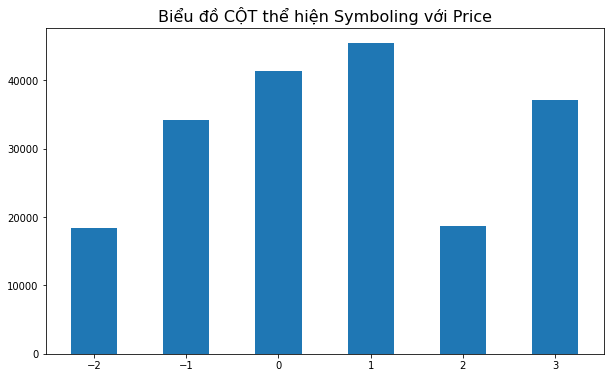

In [6]:
## Vẽ biểu đồ CỘT bằng thư viện Matplotlib
import matplotlib.pyplot as plt  
# x = df.loc[:,'symboling']
x = df.symboling.values

# y = df.loc[:,'price']
y = df.price.values

# color = np.random.randint(0,100,50)
plt.figure(figsize=(10, 6));
plt.bar(x, y, width=0.5);
plt.title("Biểu đồ CỘT thể hiện Symboling với Price",fontsize=16);
plt.xlabel=('Độ an toàn giảm dần từ -2 tới 3');
plt.ylabel=('Giá tiền của xe tăng dần');
plt.show()

## 

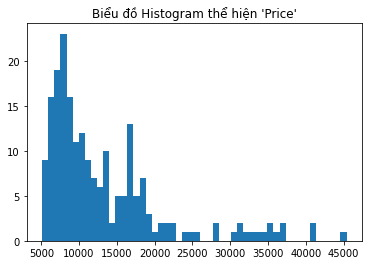

In [7]:
## Vẽ biểu đồ Histogram bằng thư viện Matplotlib

# x = df.loc[:,'symboling']
y = df.loc[:,'price']
# color = np.random.randint(0,100,50)
plt.hist(y, bins=50)
plt.title("Biểu đồ Histogram thể hiện 'Price'")
plt.xlabel = ('Độ an toàn giảm dần (-2 tới 3)')
plt.ylabel = ('Giá tiền của xe tăng dần')

plt.show()

## Như vậy xe giá tầm thấp từ 5000 - 15000 có số lượng nhiều nhất
## Xe giá tầm trung >15000 - <30000 số lượng ít hơn
## Và xe giá tầm cao > 30000 số lượng ít nhất
## Trong loại xe tầm thấp, mức giá phổ biến trong khoảng 8000 - dưới 10.000
## Trong loại xe tầm trung, mức giá phổ biến trong khoảng 16.000 - 17.000
## Trong loại xe tầm cao, hầu như không có mức giá phổ biến



In [8]:
column_drop = ["car_ID","Hang_Car","CarName","price"]
df1 = df.drop(column_drop, axis=1, inplace=False)
df1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [ ]:
for i in df1.columns:
    x = df1.loc[:,i]
    y = df.loc[:,'price']
    # color = np.random.randint(0,100,50)
    plt.scatter(y, x, alpha=0.5)
    plt.title(f"Biểu đồ Scatter thể hiện {i} với 'Price'")
    # plt.xlabel(f'Thuộc tính {i}')
    # plt.ylabel('Giá tiền của xe tăng dần')
    plt.show()

Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng

In [ ]:
df.info()

In [10]:
df_heatmap = df.drop(df.columns[2:10], axis=1)
df_heatmap = df_heatmap.drop(['car_ID','enginetype','cylindernumber','fuelsystem'], axis=1)
# df_heatmap = df.drop([''])
df_heatmap.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
corr1= df_heatmap.corr()
corr1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


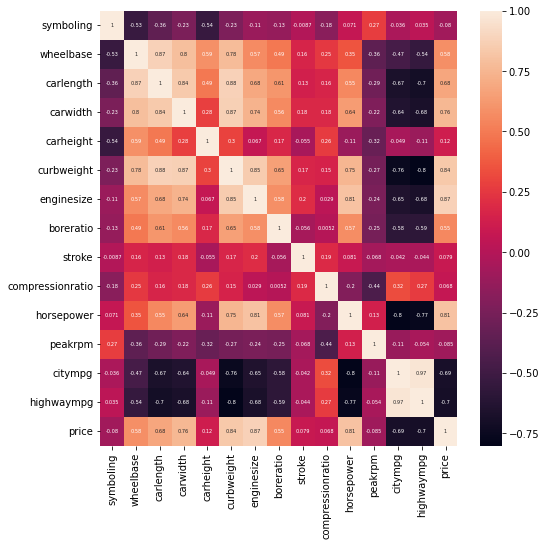

In [13]:
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(corr1,annot=True,annot_kws={'size':5})
plt.show()

## Dựa vào biểu đồ Heatmap với các biến định lượng, ta thấy các cặp biến định lượng có quan hệ với nhau.
# highwaympg - price, citympg - price, engineersize - price, curbweight - price, 
# carwidth -price, carlength -price

Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả
tần số, tần suất, các phép kiểm định

In [14]:
from scipy.stats import pearsonr
import seaborn as sns
from cmath import sqrt
from scipy.stats import chi2_contingency

In [15]:
## Kiểm định TƯƠNG QUAN ĐỊNH LƯỢNG
# Mức ý nghĩa alpha 5%
alpha = 0.05  
# ĐK: Nếu pvalue < alpha ==> 2 thuộc tính ĐỊNH LƯỢNG có tương quan
#     Nếu pvalue >= alpha ==> 2 thuộc tính KHÔNG TƯƠNG QUAN
# df_dinh_Luong = ['highwaympg', 'citympg', 'enginesize', 'curbweight','carwidth', 'carlength']

for i in df_heatmap.columns:
    r, pvalue = pearsonr(df_heatmap[i], df_heatmap['price'])
    if pvalue < alpha:
        print(f"Thuộc tính 'price' và  '{i}'  tương quan. \nHệ số tương quan r= {r} và pvalue= {pvalue}")

## Nhận xét:
# Với các cặp thuộc tính có pvalue < alpha, cặp r > 0 ==> TƯƠNG QUAN THUẬN
# Các thuộc tính còn tại
# Với các cặp thuộc tính có pvalue < alpha, cặp r < 0 ==> TƯƠNG QUAN NGHỊCH
# highwaympg, citympg

Thuộc tính 'price' và  'wheelbase'  tương quan. 
Hệ số tương quan r= 0.5778155982921502 và pvalue= 1.1828204863377837e-19
Thuộc tính 'price' và  'carlength'  tương quan. 
Hệ số tương quan r= 0.682920015677962 và pvalue= 1.6787066240748032e-29
Thuộc tính 'price' và  'carwidth'  tương quan. 
Hệ số tương quan r= 0.7593252997415115 và pvalue= 9.627437876119841e-40
Thuộc tính 'price' và  'curbweight'  tương quan. 
Hệ số tương quan r= 0.8353048793372968 và pvalue= 1.214444826403117e-54
Thuộc tính 'price' và  'enginesize'  tương quan. 
Hệ số tương quan r= 0.8741448025245117 và pvalue= 1.3547637598648421e-65
Thuộc tính 'price' và  'boreratio'  tương quan. 
Hệ số tương quan r= 0.5531732367984437 và pvalue= 7.907922278249421e-18
Thuộc tính 'price' và  'horsepower'  tương quan. 
Hệ số tương quan r= 0.8081388225362216 và pvalue= 1.4834365732941758e-48
Thuộc tính 'price' và  'citympg'  tương quan. 
Hệ số tương quan r= -0.68575133602704 và pvalue= 7.978684249663408e-30
Thuộc tính 'price' và  'highwa

In [16]:
## Kiểm định TƯƠNG QUAN ĐỊNH TÍNH

# Lọc các thuộc tính định tính
df_chi_Square = df[['Hang_Car','fueltype','aspiration','carbody','doornumber','drivewheel','cylindernumber','enginetype','enginelocation','fuelsystem']]
df_chi_Square.head()
# df.info()

,Hang_Car,fueltype,aspiration,carbody,doornumber,drivewheel,cylindernumber,enginetype,enginelocation,fuelsystem
0,alfa-romero,gas,std,convertible,two,rwd,four,dohc,front,mpfi
1,alfa-romero,gas,std,convertible,two,rwd,four,dohc,front,mpfi
2,alfa-romero,gas,std,hatchback,two,rwd,six,ohcv,front,mpfi
3,audi,gas,std,sedan,four,fwd,four,ohc,front,mpfi
4,audi,gas,std,sedan,four,4wd,five,ohc,front,mpfi


In [17]:
# Tạo bảng Tần số xuất hiện của 'Cylinenumber' với 'Price'
contigency = pd.crosstab(df['cylindernumber'].sort_values(ascending=True),df['price'])
contigency

price,5118.0,5151.0,5195.0,5348.0,5389.0,5399.0,5499.0,5572.0,6095.0,6189.0,...,34028.0,34184.0,35056.0,35550.0,36000.0,36880.0,37028.0,40960.0,41315.0,45400.0
cylindernumber,,,,,,,,,,,,,,,,,,,,,
eight,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
five,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
four,1,0,1,1,1,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
six,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
three,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twelve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
two,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Áp dụng công thức chi_square với tham số
# chi2: Thống kê thử nghiệm
# p: Giá trị p của phép thử
# dof: Mức độ tự do
# expected: Các tần suất dự kiến, dựa trên tổng số tiền biên của bảng

chi_sq, p, dof, expected = chi2_contingency(contigency)
print("Chi-square value ",chi_sq)
print("p val ",p)
print("Degree of fredom ", dof)
# print("Expected ",expected)

Chi-square value  1225.084512578616
p val  0.022638383852255542
Degree of fredom  1128


In [19]:
## TƯƠNG TỰ, ÁP DỤNG CHI_SQUARE VỚI TỪNG THUỘC TÍNH KHÁC

for i in df_chi_Square.columns:
    contigency = pd.crosstab(df_chi_Square[i],df['price'])
    chi_sq, pvalue, dof, expected = chi2_contingency(contigency)
    
    if pvalue <0.05:
        print(f"Thuộc tính 'price' có tương quan với định tính '{i}' thông qua pvalue = {pvalue}")
        
## Nhận xét, trong các thuộc tính định tính thì chỉ có 'cylinedernumber'
## có tương quan với 'price' với pvalue = 0.0226

Thuộc tính 'price' có tương quan với định tính 'cylindernumber' thông qua pvalue = 0.022638383852255542


Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban
đầu

In [20]:
for i in df_chi_Square.columns:
    print(f"{i} : {df_chi_Square[i].unique()}")

Hang_Car : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
doornumber : ['two' 'four']
drivewheel : ['rwd' 'fwd' '4wd']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
enginelocation : ['front' 'rear']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [21]:
df_dummy = df[['carbody','enginelocation','fuelsystem','fueltype','drivewheel','enginetype']]
df_dummy

,carbody,enginelocation,fuelsystem,fueltype,drivewheel,enginetype
0,convertible,front,mpfi,gas,rwd,dohc
1,convertible,front,mpfi,gas,rwd,dohc
2,hatchback,front,mpfi,gas,rwd,ohcv
3,sedan,front,mpfi,gas,fwd,ohc
4,sedan,front,mpfi,gas,4wd,ohc
...,...,...,...,...,...,...
200,sedan,front,mpfi,gas,rwd,ohc
201,sedan,front,mpfi,gas,rwd,ohc
202,sedan,front,mpfi,gas,rwd,ohcv
203,sedan,front,idi,diesel,rwd,ohc


In [ ]:
pd.get_dummies(df_dummy)


Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature
selection để chọn các thuộc tính tốt nhất.

In [ ]:
sns.pairplot(df_heatmap)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import pandas as pd

df = pd.read_csv("./Case_study_CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
name = df['CarName'].str.split()
name2 = []
for i in name:
    i = i[0]
    # i.unique()
    # print(i)
    name2.append(i)
name2
df.insert(2,"Hang_Car",name2)


In [13]:
df.head()

,car_ID,symboling,Hang_Car,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [85]:
# df_model_1 = df[['symboling','Hang_Car','fueltype','price']]
df_model_1 = df[['fueltype','price']]

df_model_1.drop_duplicates()
df_model_1.head()
df_model_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fueltype  205 non-null    object 
 1   price     205 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [104]:
df_dummy_1 = pd.get_dummies(df_model_1)
df_dummy_1.head()

,price,fueltype_diesel,fueltype_gas
0,13495.0,0,1
1,16500.0,0,1
2,16500.0,0,1
3,13950.0,0,1
4,17450.0,0,1


In [105]:
## Mảng y chứa thuộc tính giá bán. Mảng X chứa các cột còn lại
y_1 = df_dummy_1['price'].values
X_1 = df_dummy_1.drop('price',axis=1).values

print(y_1.shape); 
print(X_1.shape)

(205,)
(205, 2)


In [106]:
#Reshape y to have 1 column
y_1=y_1.reshape(-1,1)
print(y_1.shape)

# X_1=X_1.reshape(-1,1)
print(X_1.shape)

(205, 1)
(205, 2)


In [107]:
# Chia dữ liệu làm 2 phần: 80% train và 20% test
X_train_1,X_test_1,y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.2)

In [108]:
# Tạo đối tượng regressor
LR= LinearRegression()

# Training bằng fit()
LR.fit(X_train_1,y_train_1)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = [14252.49619597]
Coefficients: [[ 1399.61491514 -1399.61491514]]


Đánh giá mô hình

In [110]:
# Dự đoán giá cả thông qua X
y_predict_1 = LR.predict(X_test_1)

In [109]:
LR.score(X_train_1,y_train_1.ravel())

0.011639364804181485

In [111]:
## Mô hình dự đoán
train_1 = r2_score(y_train_1, LR.predict(X_train_1))
print('R2-score trên tập huấn luyện: ',train_1)
test_1 = r2_score(y_test_1, y_predict_1)
print('R2-score trên tập kiểm: ',test_1)

print('Mean_sqrd_error is: ',mean_squared_error(y_test_1,y_predict_1))
print('Root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test_1,y_predict_1)))


R2-score trên tập huấn luyện:  0.011639364804181485
R2-score trên tập kiểm:  0.0018057233980910414
Mean_sqrd_error is:  54067546.44080017
Root_mean_squared error of is:  7353.063745188136


Ta nhận thấy r2_score rất nhỏ và RMSE rất lớn
Nên mô hình trên không đáng tin cậy

In [132]:
df_model_2 = df[['symboling','price']]

df_model_2.drop_duplicates()
df_model_2.head()
df_model_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symboling  205 non-null    int64  
 1   price      205 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [133]:
df_dummy_2 = pd.get_dummies(df_model_2)
df_dummy_2.head()

,symboling,price
0,3,13495.0
1,3,16500.0
2,1,16500.0
3,2,13950.0
4,2,17450.0


In [134]:
## Mảng y chứa thuộc tính giá bán. Mảng X chứa các cột còn lại
y_2 = df_dummy_2['price'].values
X_2 = df_dummy_2.drop('price',axis=1).values

print(y_2.shape)
print(X_2.shape)

(205,)
(205, 1)


In [135]:
y_2 = y_2.reshape(-1,1)
# X_2 = X_2.reshape(-1,2)
print(X_2.shape)
print(y_2.shape)


(205, 1)
(205, 1)


In [136]:
# Chia dữ liệu làm 2 phần: 80% train và 20% test
X_train_2,X_test_2,y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.2)

In [137]:
# Tạo đối tượng regressor
LR= LinearRegression()

# Training bằng fit()
LR.fit(X_train_2,y_train_2)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = [13434.86632074]
Coefficients: [[-447.60690238]]


Đánh giá mô hình

In [138]:
# Dự đoán giá cả thông qua X
y_predict_2 = LR.predict(X_test_2)
LR.score(X_train_2,y_train_2.ravel())

0.00522179795872546

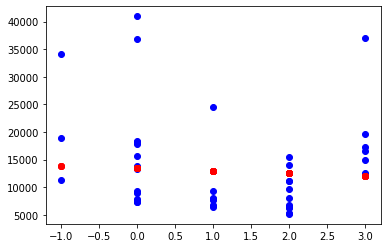

In [140]:
plt.scatter(X_test_2, y_test_2,  color='blue')
plt.scatter(X_test_2, y_predict_2, color='red')
plt.show()

In [131]:
## Mô hình dự đoán
train_2 = r2_score(y_train_2, LR.predict(X_train_2))
print('R2-score trên tập huấn luyện: ',train_2)
test_2 = r2_score(y_test_2, y_predict_2)
print('R2-score trên tập kiểm: ',test_2)

print('Mean_sqrd_error is: ',mean_squared_error(y_test_2,y_predict_2))
print('Root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test_2,y_predict_2)))


R2-score trên tập huấn luyện:  0.001685377922202469
R2-score trên tập kiểm:  -0.040323591083149424
Mean_sqrd_error is:  49543600.671673976
Root_mean_squared error of is:  7038.721522526231


Mô hình này không đáng tin cậy
Như vậy, thông số an toàn symboling không tương quan tới giá bán xe

In [141]:
df_model_3 = df[['wheelbase','price']]
df_model_3.drop_duplicates()
df_model_3.head()
df_model_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wheelbase  205 non-null    float64
 1   price      205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [142]:
df_dummy_3 = pd.get_dummies(df_model_3)
df_dummy_3.head()

,wheelbase,price
0,88.6,13495.0
1,88.6,16500.0
2,94.5,16500.0
3,99.8,13950.0
4,99.4,17450.0


In [143]:
## Mảng y chứa thuộc tính giá bán. Mảng X chứa các cột còn lại
y_3 = df_dummy_3['price'].values
X_3 = df_dummy_3.drop('price',axis=1).values

print(y_3.shape)
print(X_3.shape)

(205,)
(205, 1)


In [144]:
y_3 = y_3.reshape(-1,1)
# X_2 = X_2.reshape(-1,2)
print(X_3.shape)
print(y_3.shape)

(205, 1)
(205, 1)


In [145]:
# Chia dữ liệu làm 2 phần: 80% train và 20% test
X_train_3,X_test_3,y_train_3, y_test_3 = train_test_split(X_3,y_3,test_size=0.2)

In [146]:
# Tạo đối tượng regressor
LR= LinearRegression()

# Training bằng fit()
LR.fit(X_train_3,y_train_3)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = [-62072.6958071]
Coefficients: [[765.11098283]]


Đánh giá mô hình

In [147]:
# Dự đoán giá cả thông qua X
y_predict_3 = LR.predict(X_test_3)
LR.score(X_train_3,y_train_3.ravel())

0.3288913707633294

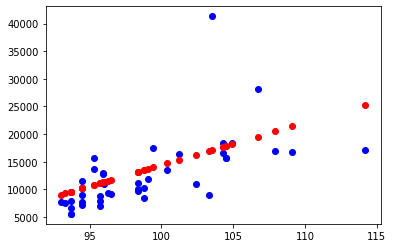

In [148]:
plt.scatter(X_test_3, y_test_3,  color='blue')
plt.scatter(X_test_3, y_predict_3, color='red')
plt.show()

In [149]:
## Mô hình dự đoán
train_3 = r2_score(y_train_3, LR.predict(X_train_3))
print('R2-score trên tập huấn luyện: ',train_3)
test_3 = r2_score(y_test_3, y_predict_3)
print('R2-score trên tập kiểm: ',test_3)

print('Mean_sqrd_error is: ',mean_squared_error(y_test_3,y_predict_3))
print('Root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test_3,y_predict_3)))


R2-score trên tập huấn luyện:  0.3288913707633294
R2-score trên tập kiểm:  0.35345764459911144
Mean_sqrd_error is:  26787553.86634354
Root_mean_squared error of is:  5175.669412389429


In [ ]:
Mô hình này không đáng tin cậy
Như vậy, thông số an toàn symboling không tương quan tới giá bán xe

In [7]:
df_getdummies = df.drop(['car_ID','symboling','CarName'],axis=1)
df_getdummies.head()

,Hang_Car,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df_getdummies = pd.get_dummies(df_getdummies)
df_getdummies.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df_getdummies.shape

(205, 80)

In [10]:
## Mảng y chứa thuộc tính giá bán. Mảng X chứa các cột còn lại
y= df_getdummies['price'].values
X= df_getdummies.drop('price',axis=1).values

In [11]:
print(y.shape)
print(X.shape)

(205,)
(205, 79)


In [12]:
#Reshape y to have 1 column
y=y.reshape(-1,1)
y.shape

(205, 1)

In [88]:
## Chia dữ liệu thành 2 phần
## 80% là train và 20% là test

#Split the arrays into training and testing data sets
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2)

Huấn luyện mô hình

In [91]:
#Create a regressor object
LR= LinearRegression()

#Fit training set to the regressor
model = LR.fit(X_train,y_train)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = [-34058.88397742]
Coefficients: [[ 2.93438423e+02 -1.13551416e+02  6.33611568e+02 -2.50159457e+02
   5.75688467e+00  8.29050153e+01 -2.71534754e+03 -1.28391296e+03
  -7.88363435e+02 -7.31033272e-01  2.41029968e+00 -3.41807494e+01
   1.49925364e+02 -1.56159153e+03  1.56414528e+03  2.45775927e+03
   1.27457984e+04  4.34139614e+03 -2.71564356e+03 -3.21478244e+03
  -3.65923762e+02 -9.23506297e+02  1.54716285e+03 -8.83603373e+02
   5.85439945e+01 -1.49549552e+03 -3.80417138e+03 -8.68557433e+02
  -5.48755004e+03 -3.43047522e+03  3.66231336e+03  5.55227583e+03
  -1.55838478e+03  2.18268776e+03 -4.05732286e+03 -1.18218655e+03
  -6.58402932e+02 -1.41081858e+03 -3.50247823e+02 -2.40000758e+02
   9.65819292e+01  3.46065635e+03 -3.46065635e+03 -8.86167731e+02
   8.86167731e+02  6.25435059e+01 -6.25435059e+01  1.83080841e+03
  -1.35963729e+02 -8.91189197e+02 -1.93493474e+02 -6.10162014e+02
   1.18095942e+02 -2.60279698e+02  

Dùng mô hình

In [90]:
#Make predictions with the regressor
y_prediction = LR.predict(X_test)

Đánh giá mô hình

In [95]:
# Tính R2-score
score= r2_score(y_test,y_prediction)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

R2-score is  0.8522601578099642
Mean_sqrd_error is== 6018212.667754046
Root_mean_squared error of is== 2453.2045711179585
